In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
file

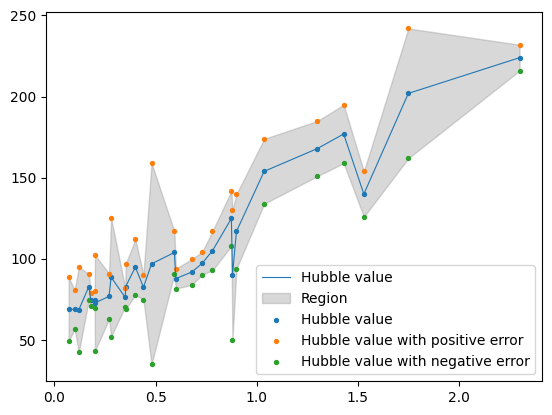

In [9]:

file = pd.read_excel("Code the Cosmos Data.xlsx")
z=file['Redshift']
target=file['Hubble parameter(km/s/Mpc)']
error=file['Error in Hubble Parameter(km/s/Mpc)']
plt.plot(file['Redshift'], file['Hubble parameter(km/s/Mpc)'], label='Hubble value', linewidth=0.8)
plt.fill_between(z, target - file['Error in Hubble Parameter(km/s/Mpc)'], 
                 target + file['Error in Hubble Parameter(km/s/Mpc)'], 
                 color='gray', alpha=0.3, label='Region')

plt.scatter(file['Redshift'], file['Hubble parameter(km/s/Mpc)'], label='Hubble value', s=8)
plt.scatter(file['Redshift'], file['Hubble parameter(km/s/Mpc)'] + file['Error in Hubble Parameter(km/s/Mpc)'], label='Hubble value with positive error', s=8)
plt.scatter(file['Redshift'], file['Hubble parameter(km/s/Mpc)'] - file['Error in Hubble Parameter(km/s/Mpc)'], label='Hubble value with negative error', s=8)

plt.legend()
plt.show()


In [4]:


H_0 = 73.04 

z = file['Redshift']
target=file['Hubble parameter(km/s/Mpc)']


expression:
H^2=sigma_m *H_0*(1+z)^3   +sigma_k*H_0*( 1+z)^2 + sigma*H_0

there input variables as H_0*(1+z)^3  let input1.
second H_0*(1+z)^2 .let input2
third H_0



third parameter that supposed to find.
sigma_m
sigma_k
sigma

we will use linear regression.



In [10]:
H_0=H_0*H_0
target=target**2

input1 = H_0 * (1 + z) ** 3
input2 = H_0 * (1 + z) ** 2
input3 = H_0 * (z / z)

X = np.column_stack((input1, input2, input3))


#by linear Regression LS.
w=np.linalg.inv(X.T@X)@X.T@target
w


array([ 1.09030355e-05,  1.35251583e-04, -2.99359211e-05])

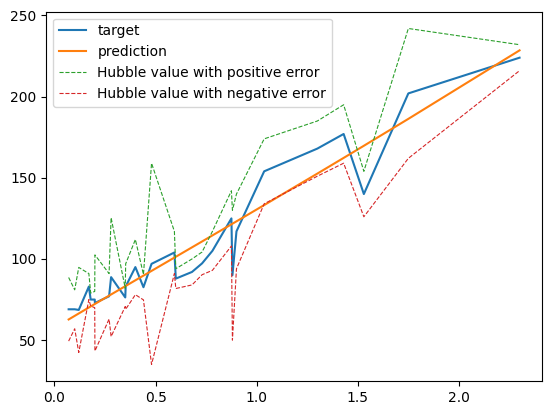

In [6]:
predict=X@w
prediction=predict**(1/2)
target=target**(1/2)
plt.plot(z,target,label='target')
plt.plot(z,(prediction),label='prediction')
plt.plot(file['Redshift'], file['Hubble parameter(km/s/Mpc)'] + file['Error in Hubble Parameter(km/s/Mpc)'], label='Hubble value with positive error', linewidth=0.8, linestyle='--')
plt.plot(file['Redshift'], file['Hubble parameter(km/s/Mpc)'] - file['Error in Hubble Parameter(km/s/Mpc)'], label='Hubble value with negative error', linewidth=0.8, linestyle='--')

plt.legend()

In [ ]:



file = pd.read_excel("Code the Cosmos Data.xlsx")

plt.plot(file['Redshift'], file['Hubble parameter(km/s/Mpc)'], label='Hubble value', linewidth=0.8)
plt.plot(file['Redshift'], file['Hubble parameter(km/s/Mpc)'] + file['Error in Hubble Parameter(km/s/Mpc)'], label='Hubble value with positive error', linewidth=0.8, linestyle='--')
plt.plot(file['Redshift'], file['Hubble parameter(km/s/Mpc)'] - file['Error in Hubble Parameter(km/s/Mpc)'], label='Hubble value with negative error', linewidth=0.8, linestyle='--')

plt.scatter(file['Redshift'], file['Hubble parameter(km/s/Mpc)'], label='Hubble value', s=8)
plt.scatter(file['Redshift'], file['Hubble parameter(km/s/Mpc)'] + file['Error in Hubble Parameter(km/s/Mpc)'], label='Hubble value with positive error', s=8)
plt.scatter(file['Redshift'], file['Hubble parameter(km/s/Mpc)'] - file['Error in Hubble Parameter(km/s/Mpc)'], label='Hubble value with negative error', s=8)
plt.fill_between(z, target - file['Error in Hubble Parameter(km/s/Mpc)'], 
                 target + file['Error in Hubble Parameter(km/s/Mpc)'], 
                 color='gray', alpha=0.3, label='Prediction Error')
plt.legend()
plt.show()


H_0 = 73.04 

z = file['Redshift']
target=file['Hubble parameter(km/s/Mpc)']

H_0=H_0*H_0
target=target**2

input1 = H_0 * (1 + z) ** 3
input2 = H_0 * (1 + z) ** 2
input3 = H_0 * (z / z)

X = np.column_stack((input1, input2, input3))


#by linear Regression LS.
w=np.linalg.inv(X.T@X)@X.T@target
w
predict=X@w
prediction=predict**(1/2)
target=target**(1/2)
plt.plot(z,target,label='target')
plt.plot(z,(prediction),label='prediction')
plt.plot(file['Redshift'], file['Hubble parameter(km/s/Mpc)'] + file['Error in Hubble Parameter(km/s/Mpc)'], label='Hubble value with positive error', linewidth=0.8, linestyle='--')
plt.plot(file['Redshift'], file['Hubble parameter(km/s/Mpc)'] - file['Error in Hubble Parameter(km/s/Mpc)'], label='Hubble value with negative error', linewidth=0.8, linestyle='--')

plt.legend()

/home/pavankumar/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


$\Omega_m$: 0.09231338120760404 +0.07900199848337265 -0.07900199848337265
$\Omega_k$: -0.7958688005702871 +0.20285040243348645 -0.20285040243348645
$\Omega_\Lambda$: 0.34017135882933336 +0.27000383969976616 -0.27000383969976616


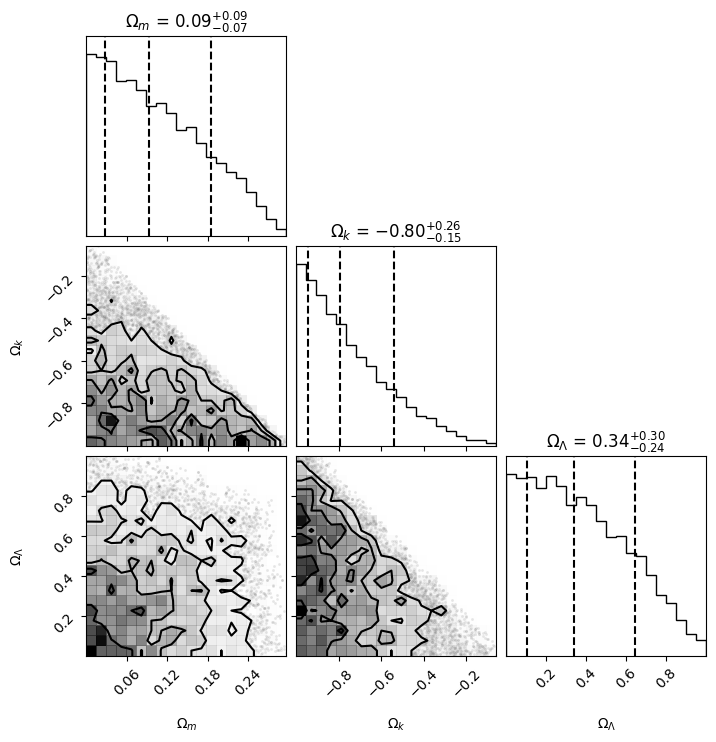

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import emcee
import corner

# Read data
file = pd.read_excel("Code the Cosmos Data.xlsx")
z = file['Redshift']
target = file['Hubble parameter(km/s/Mpc)']
err = file['Error in Hubble Parameter(km/s/Mpc)']

# Define likelihood function
def ln_likelihood(params):
    # Unpack parameters
    Omega_m, Omega_k, Omega_Lambda = params
    
    # Calculate Hubble parameter predictions
    H_pred = calculate_Hubble_parameter(z, Omega_m, Omega_k, Omega_Lambda)
    
    # Calculate log-likelihood
    ln_likelihood = -0.5 * np.sum(((H_pred - target) / err)**2)
    return ln_likelihood

# Define prior distribution for parameters
def ln_prior(params):
    Omega_m, Omega_k, Omega_Lambda = params
    if 0 < Omega_m < 1 and -1 < Omega_k < 1 and 0 < Omega_Lambda < 1:
        return 0.0  # Flat prior within allowed range
    return -np.inf  # Outside the allowed range

# Define log-posterior function
def ln_posterior(params):
    ln_prior_val = ln_prior(params)
    if not np.isfinite(ln_prior_val):
        return -np.inf  # Reject parameters outside prior range
    ln_likelihood_val = ln_likelihood(params)
    return ln_prior_val + ln_likelihood_val

# Define function to calculate Hubble parameter predictions
def calculate_Hubble_parameter(z, Omega_m, Omega_k, Omega_Lambda):
    # Define model to calculate Hubble parameter
    # Replace this with your model calculation
    return np.sqrt(H_0 * (Omega_m * (1 + z)**3 + Omega_k * (1 + z)**2 + Omega_Lambda))

# Set up emcee sampler
ndim = 3  # Number of parameters
nwalkers = 100  # Number of walkers
nsteps = 1000  # Number of MCMC steps
initial_guess = np.random.rand(nwalkers, ndim)  # Initial guess for parameters
sampler = emcee.EnsembleSampler(nwalkers, ndim, ln_posterior)

# Run MCMC sampler
sampler.run_mcmc(initial_guess, nsteps)

# Get MCMC samples
samples = sampler.get_chain(discard=100, thin=10, flat=True)

# Plot marginalized distributions
labels = [r'$\Omega_m$', r'$\Omega_k$', r'$\Omega_\Lambda$']
fig = corner.corner(samples, labels=labels, quantiles=[0.16, 0.5, 0.84], show_titles=True)

# Calculate and report uncertainties
percentiles = [16, 50, 84]
medians = np.percentile(samples, percentiles, axis=0)
uncertainties = (medians[2] - medians[0]) / 2
for i, label in enumerate(labels):
    print(f"{label}: {medians[1][i]} +{uncertainties[i]} -{uncertainties[i]}")

# Show plots
plt.show()
